In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
df = pd.read_csv('iris.csv',na_values=['','NA'],keep_default_na=False)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
s = df.isna().sum()

In [5]:
s

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
s[s>0]

Series([], dtype: int64)

In [8]:
df.duplicated().sum()

1

In [9]:
X = df.drop(columns=['species'])
Y = df[['species']]

In [10]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
Y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [12]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [13]:
num_pipe = Pipeline(steps=[('impute',SimpleImputer()),
                           ('scaler',StandardScaler())]).set_output(transform='pandas')

In [27]:
num_pipe

Pipeline(steps=[('impute', SimpleImputer()), ('scaler', StandardScaler())])

In [14]:
pre = num_pipe.fit_transform(X)
pre

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [15]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(pre,Y,test_size=0.33,random_state=21)

In [16]:
xtrain.head()

,sepal_length,sepal_width,petal_length,petal_width
52,1.280340,0.098217,0.649083,0.395774
49,-1.021849,0.558611,-1.340227,-1.315444
65,1.038005,0.098217,0.364896,0.264142
118,2.249683,-1.052767,1.785832,1.448832
55,-0.173674,-0.592373,0.421734,0.132510


In [17]:
ytrain.head()

,species
52,versicolor
49,setosa
65,versicolor
118,virginica
55,versicolor


In [18]:
xtest.head()

,sepal_length,sepal_width,petal_length,petal_width
92,-0.052506,-1.052767,0.137547,0.000878
44,-0.900681,1.709595,-1.056039,-1.052180
7,-1.021849,0.788808,-1.283389,-1.315444
21,-0.900681,1.479398,-1.283389,-1.052180
95,-0.173674,-0.131979,0.251221,0.000878


In [19]:
ytest.head()

,species
92,versicolor
44,setosa
7,setosa
21,setosa
95,versicolor


In [20]:
len(xtrain)

100

In [21]:
len(xtest)

50

In [24]:
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(max_depth=1,
                                min_samples_split=5,
                                min_samples_leaf=5,
                                criterion='entropy')
model1.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=5,
                       min_samples_split=5)

In [25]:
model1.score(xtrain,ytrain)

0.67

In [26]:
model1.score(xtest,ytest)

0.66

In [28]:
params = {'max_depth':[1,2,3,4,5],
          'min_samples_split':[2,3,4,5,6,7],
          'min_samples_leaf' :[2,3,4,5,6,7],
          'criterion':['gini','entropy']}

In [29]:
from sklearn.model_selection import GridSearchCV
dtc = DecisionTreeClassifier()
gscv = GridSearchCV(dtc,param_grid=params,cv = 5,scoring='f1_macro')
gscv.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 3, 4, 5, 6, 7]},
             scoring='f1_macro')

In [30]:
gscv.best_score_

0.980854700854701

In [31]:
gscv.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'min_samples_leaf': 2,
 'min_samples_split': 3}

In [32]:
best_dtc = gscv.best_estimator_
best_dtc

DecisionTreeClassifier(max_depth=2, min_samples_leaf=2, min_samples_split=3)

In [36]:
best_dtc.score(xtrain,ytrain)

0.98

In [37]:
best_dtc.score(xtest,ytest)

0.88

In [41]:
ypred_train = best_dtc.predict(xtrain)
ypred_test = best_dtc.predict(xtest)

In [42]:
ypred_train[0:5]

array(['versicolor', 'setosa', 'versicolor', 'virginica', 'versicolor'],
      dtype=object)

In [43]:
ypred_test[0:5]

array(['versicolor', 'setosa', 'setosa', 'setosa', 'versicolor'],
      dtype=object)

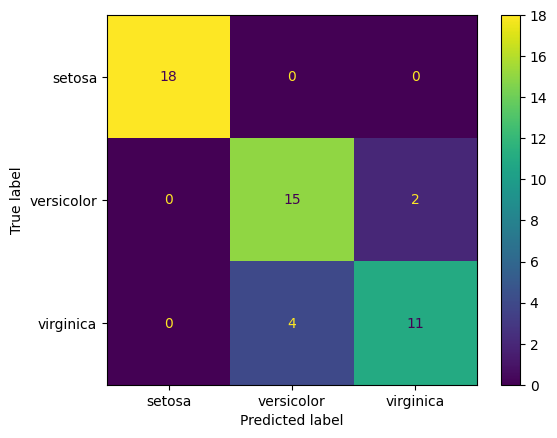

In [44]:
from sklearn.metrics import ConfusionMatrixDisplay
cfd = ConfusionMatrixDisplay.from_estimator(best_dtc, xtest, ytest)
cfd

In [45]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       0.79      0.88      0.83        17
   virginica       0.85      0.73      0.79        15

    accuracy                           0.88        50
   macro avg       0.88      0.87      0.87        50
weighted avg       0.88      0.88      0.88        50



In [46]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(best_dtc,xtrain,ytrain,cv=5,scoring='f1_macro')
scores

array([0.95213675, 0.95213675, 1.        , 1.        , 0.8968254 ])

In [47]:
scores.mean()

0.9602197802197804

In [49]:
xnew = pd.read_csv('iris_sample.csv')
xnew.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.5,2.5,4.0,1.3
1,6.9,3.1,5.1,2.3
2,5.1,2.5,3.0,1.1
3,4.4,2.9,NaN,0.2
4,5.9,3.0,5.1,1.8


In [50]:
num_pipe

Pipeline(steps=[('impute', SimpleImputer()), ('scaler', StandardScaler())])

In [51]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.416010,-1.282963,0.137547,0.132510
1,1.280340,0.098217,0.762758,1.448832
2,-0.900681,-1.282963,-0.430828,-0.130755
3,-1.748856,-0.362176,0.000000,-1.315444
4,0.068662,-0.131979,0.762758,0.790671


In [54]:
preds = best_dtc.predict(xnew_pre)
proba = best_dtc.predict_proba(xnew_pre)

In [55]:
preds

array(['versicolor', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'setosa', 'versicolor', 'virginica', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'versicolor', 'virginica'],
      dtype=object)

In [56]:
proba

array([[0.        , 0.94285714, 0.05714286],
       [0.        , 0.        , 1.        ],
       [0.        , 0.94285714, 0.05714286],
       [0.        , 0.94285714, 0.05714286],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.94285714, 0.05714286],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.94285714, 0.05714286],
       [0.        , 0.94285714, 0.05714286],
       [0.        , 0.        , 1.        ],
       [0.        , 0.94285714, 0.05714286],
       [0.        , 0.        , 1.        ]])

In [59]:
import numpy as np 
max_proba = np.max(proba, axis=1)
max_proba

array([0.94285714, 1.        , 0.94285714, 0.94285714, 1.        ,
       1.        , 0.94285714, 1.        , 1.        , 1.        ,
       0.94285714, 0.94285714, 1.        , 0.94285714, 1.        ])

In [61]:
xnew['species_pred'] = preds
xnew['probs'] = max_proba

In [62]:
xnew

,sepal_length,sepal_width,petal_length,petal_width,species_pred,probs
0,5.5,2.5,4.0,1.3,versicolor,0.942857
1,6.9,3.1,5.1,2.3,virginica,1.000000
2,5.1,2.5,3.0,1.1,versicolor,0.942857
3,4.4,2.9,NaN,0.2,versicolor,0.942857
4,5.9,3.0,5.1,1.8,virginica,1.000000
5,5.5,3.5,1.3,0.2,setosa,1.000000
6,5.6,NaN,3.6,1.3,versicolor,0.942857
7,6.5,3.0,5.2,2.0,virginica,1.000000
8,5.3,3.7,1.5,0.2,setosa,1.000000
9,5.1,3.4,1.5,NaN,setosa,1.000000


In [63]:
xnew.to_csv('Results.csv', index=False)

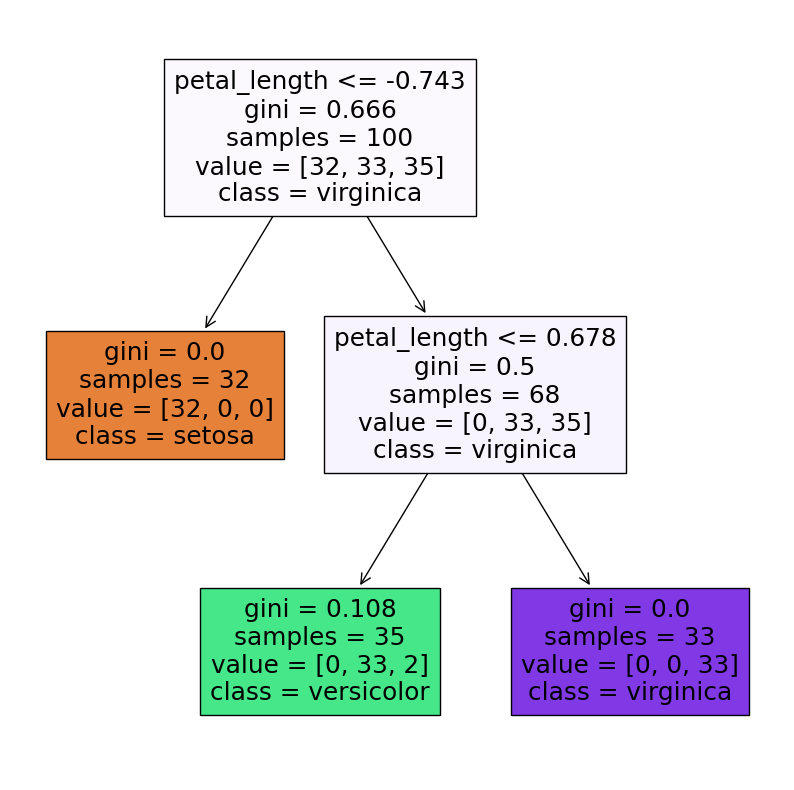

In [64]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,10))
plot_tree(best_dtc,
          feature_names=xtrain.columns,
          class_names=best_dtc.classes_,
          filled=True)
plt.show()

In [66]:
xtrain.shape

(100, 4)

In [67]:
best_dtc.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [68]:
ytrain.value_counts()

species   
virginica     35
versicolor    33
setosa        32
Name: count, dtype: int64